In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import boto3
import botocore

In [6]:
BUCKET_NAME = 'fog-datasets' # replace with your bucket name

s3 = boto3.resource('s3')

try:
    s3.Bucket(BUCKET_NAME).download_file('rcf/data/train/data.csv', 'train.csv')
    s3.Bucket(BUCKET_NAME).download_file('rcf/data/test/data.csv', 'test.csv')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

In [21]:
df = pd.concat([
    pd.read_csv('train.csv',header=None,index_col=0,parse_dates=True),
    pd.read_csv('test.csv',header=None,index_col=0,parse_dates=True)
])
df.index.name = 'Time'
df.columns = ['Value']

In [56]:
!mkdir plots

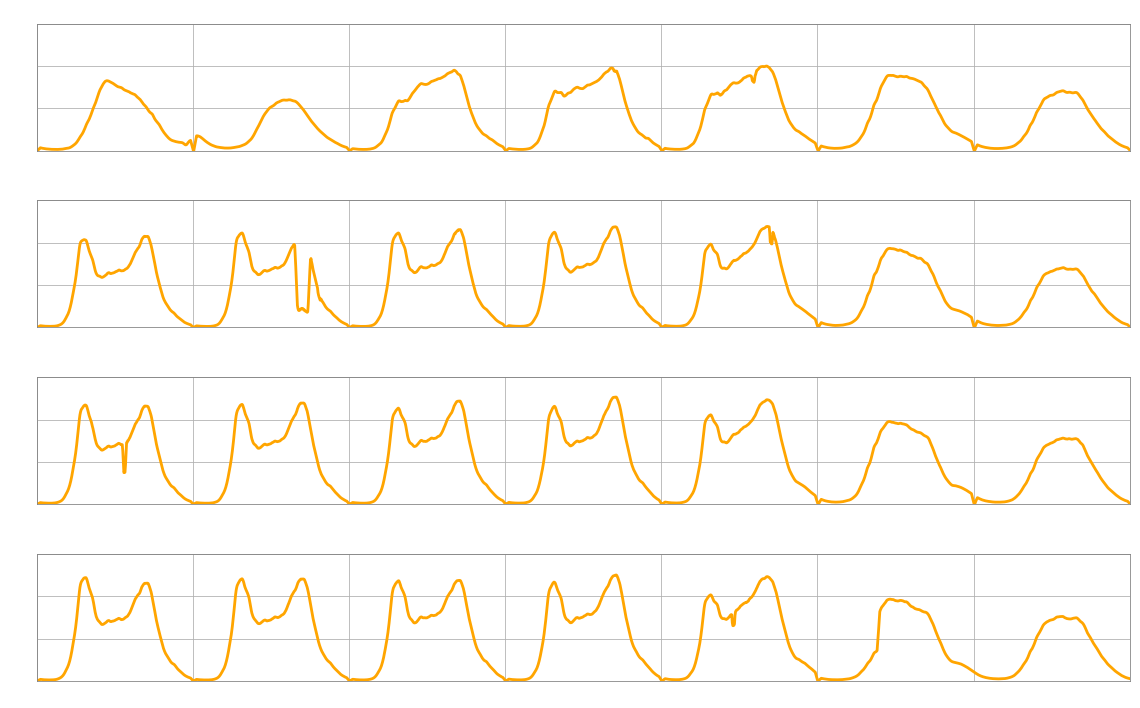

In [83]:
import matplotlib

font = dict(family='normal',weight='bold',size=12)

matplotlib.rc('font', **font)

weeks = list(df.groupby(df.index.week))

demo_weeks = weeks[:4]
fig, axs = plt.subplots(len(demo_weeks),figsize=(16,2.5*len(demo_weeks)))
c = 'white'
for i,week_group in enumerate(demo_weeks):
    weeknum = week_group[0]
    week_df = week_group[1]
    ax = axs[i]
    ax.set_title('Week {}'.format(weeknum))
    ax.plot(np.arange(len(week_df)),week_df.Value.values,linewidth=2.8,color='orange')
   
    ax.set_ylim(0,300000)
    ax.set_yticks(np.linspace(0,300000,4))
    ax.set_yticklabels(np.linspace(0,3,4,dtype='int'))
    ax.set_ylabel('100k requests per 5min',fontdict=dict(color=c,size=10))

    ax.set_xticks(np.linspace(0,len(week_df),8))
    ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
    ax.set_xlim(0,len(week_df))
    ax.spines['bottom'].set_color('grey')
    ax.spines['top'].set_color('grey') 
    ax.spines['right'].set_color('grey')
    ax.spines['left'].set_color('grey')
    ax.tick_params(axis='x', colors=c)
    ax.tick_params(axis='y', colors=c)
    ax.title.set_color(c)
#     ax.fill_between(np.arange(len(week_df)), 0, week_df.Value.values, color='green', alpha=0.3)
#     ticks = np.array(ax.get_xticks())
#     ax.set_xticks(ticks+250)
#     ax.set_xlabel('')
#     print(ax.get_xticks())
#     ax.legend_.remove()
    plt.setp(ax.texts, family='Consolas')
    ax.grid()
fig.tight_layout()
fig.savefig('plots/all_data.png',transparent=True)

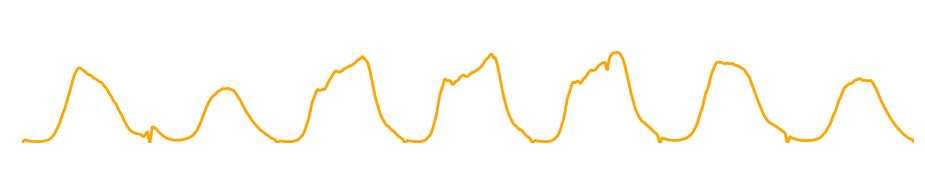

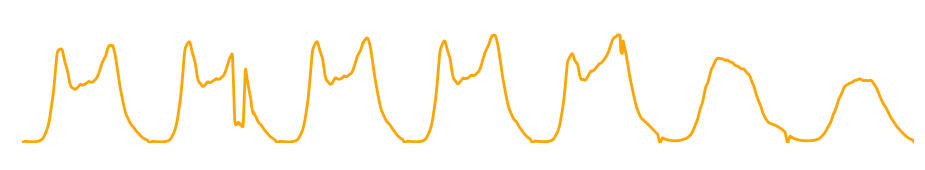

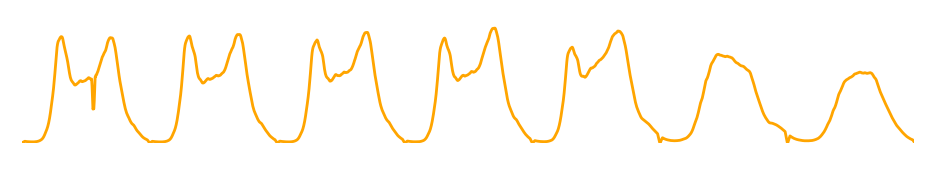

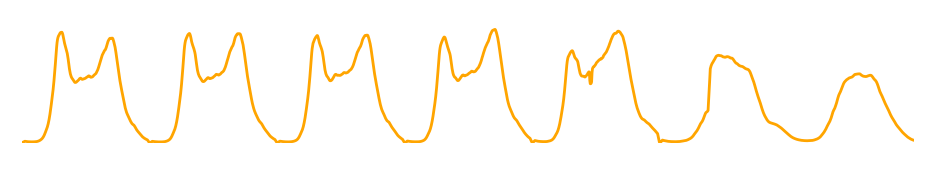

In [65]:
import matplotlib

font = dict(family='normal',weight='bold',size=12)

matplotlib.rc('font', **font)

weeks = list(df.groupby(df.index.week))

demo_weeks = weeks[:4]
c = 'white'
for i,week_group in enumerate(demo_weeks):
    fig, ax = plt.subplots(1,figsize=(16,2.5))
    weeknum = week_group[0]
    week_df = week_group[1]
#     ax.set_title('Week {}'.format(weeknum))
    ax.plot(np.arange(len(week_df)),week_df.Value.values,linewidth=2.8,color='orange')
   
    ax.set_ylim(0,300000)
    ax.set_yticks(np.linspace(0,300000,4))
    ax.set_yticklabels(np.linspace(0,3,4,dtype='int'))
#     ax.set_ylabel('100k requests per 5min',fontdict=dict(color=c,size=10))
    ax.axes.yaxis.set_visible(False)
    ax.set_xticks(np.linspace(0,len(week_df),8))
    ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
    ax.set_xlim(0,len(week_df))
    ax.spines['bottom'].set_color('grey')
    ax.spines['bottom'].set_alpha(0)
    ax.spines['top'].set_color('grey') 
    ax.spines['top'].set_alpha(0)
    ax.spines['right'].set_color('grey')
    ax.spines['right'].set_alpha(0)
    ax.spines['left'].set_color('grey')
    ax.spines['left'].set_alpha(0)
    ax.tick_params(axis='x', colors=c)
    ax.tick_params(axis='y', colors=c)
    ax.title.set_color(c)
#     ax.fill_between(np.arange(len(week_df)), 0, week_df.Value.values, color='green', alpha=0.3)
#     ticks = np.array(ax.get_xticks())
#     ax.set_xticks(ticks+250)
#     ax.set_xlabel('')
#     print(ax.get_xticks())
#     ax.legend_.remove()
    plt.setp(ax.texts, family='Consolas')
#     ax.grid()
    fig.savefig('plots/week_{}.png'.format(i),transparent=True)

In [94]:
import sys
path = sys.path[0][:-len('utils')] + 'models/mean_predictor/container'
sys.path.insert(0,path)


,Value
Time,
2019-01-01 00:00:00,4913.6
2019-01-01 00:05:00,0.0
2019-01-01 00:10:00,0.0
2019-01-01 00:15:00,6860.8
2019-01-01 00:20:00,13801.2
2019-01-01 00:25:00,20838.0
2019-01-01 00:30:00,27822.2
2019-01-01 00:35:00,34773.2
2019-01-01 00:40:00,34819.2


In [95]:
from mean_predictor import MeanPredictor

mp = MeanPredictor()
mp.fit(df[df.index.year == 2019])
pred_df = mp[pd.Timestamp(2019,1,7):pd.Timestamp(2019,1,14)]

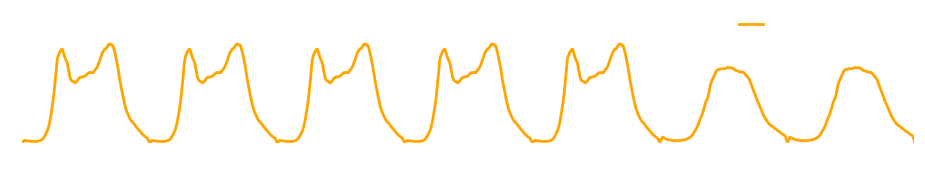

In [109]:
fig, ax = plt.subplots(1,figsize=(16,2.5))

c = 'white'
ax.plot(np.arange(len(pred_df)),pred_df.Value.values,linewidth=2.8,color='orange',label='Expected Value')
ax.fill_between(
    np.arange(len(pred_df)),
    pred_df.Value.values - pred_df.Std.values * 1.5, 
    pred_df.Value.values + pred_df.Std.values * 1.5,
    color='white',
    alpha=0.5,
    label='Standard Deviation'
)
ax.set_ylim(0,300000)
ax.set_yticks(np.linspace(0,300000,4))
ax.set_yticklabels(np.linspace(0,3,4,dtype='int'))
#     ax.set_ylabel('100k requests per 5min',fontdict=dict(color=c,size=10))
ax.axes.yaxis.set_visible(False)
ax.set_xticks(np.linspace(0,len(week_df),8))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_xlim(0,len(week_df))
ax.spines['bottom'].set_color('grey')
ax.spines['bottom'].set_alpha(0)
ax.spines['top'].set_color('grey') 
ax.spines['top'].set_alpha(0)
ax.spines['right'].set_color('grey')
ax.spines['right'].set_alpha(0)
ax.spines['left'].set_color('grey')
ax.spines['left'].set_alpha(0)
ax.tick_params(axis='x', colors=c)
ax.tick_params(axis='y', colors=c)
ax.title.set_color(c)
l = ax.legend(framealpha=0)
for text in l.get_texts():
    text.set_color(c)
fig.savefig('plots/exp_week.png',transparent=True)